In [1]:
import os
import shutil
from pathlib import Path

import cv2
import matplotlib.pyplot as plt

In [2]:
orig_dir = Path.cwd().parents[1] / "oidv6_data_converted_11classes"
mid_dir = orig_dir.parent / "oidv6_data_fruits"

orig_img_dir_train = orig_dir / "images" / "train"
mid_img_dir_train = mid_dir / "images" / "train"

orig_label_dir_train = orig_dir / "labels" / "train"
mid_label_dir_train = mid_dir / "labels" / "train"

mid_img_dir_train.mkdir(parents=True, exist_ok=True)
mid_label_dir_train.mkdir(parents=True, exist_ok=True)

In [3]:
orig_img_dir_test = orig_dir / "images" / "test"
mid_img_dir_test = mid_dir / "images" / "test"

orig_label_dir_test = orig_dir / "labels" / "test"
mid_label_dir_test = mid_dir / "labels" / "test"

mid_img_dir_test.mkdir(parents=True, exist_ok=True)
mid_label_dir_test.mkdir(parents=True, exist_ok=True)

In [6]:
labeled_train = mid_dir / "images" / "labeled_train"
labeled_train.mkdir(parents=True, exist_ok=True)

In [4]:
labeled_test = mid_dir / "images" / "labeled_test"
labeled_test.mkdir(parents=True, exist_ok=True)

In [ ]:
relabel_train = mid_dir / "images" / "relabel_train"
relabel_train.mkdir(parents=True, exist_ok=True)

In [11]:
relabel_test = mid_dir / "images" / "relabel_test"
relabel_test.mkdir(parents=True, exist_ok=True)

In [3]:
for img_path in orig_img_dir_train.glob("[0-9]*.jpg"):
    shutil.copy(img_path, mid_img_dir_train / img_path.name)

for label_path in orig_label_dir_train.glob("[0-9]*.txt"):
    shutil.copy(label_path, mid_label_dir_train / label_path.name)

for img_path in orig_img_dir_train.glob("apple*.jpg"):
    shutil.copy(img_path, mid_img_dir_train / img_path.name)

for label_path in orig_label_dir_train.glob("apple*.txt"):
    shutil.copy(label_path, mid_label_dir_train / label_path.name)

for img_path in orig_img_dir_train.glob("banana*.jpg"):
    shutil.copy(img_path, mid_img_dir_train / img_path.name)

for label_path in orig_label_dir_train.glob("banana*.txt"):
    shutil.copy(label_path, mid_label_dir_train / label_path.name)

for img_path in orig_img_dir_train.glob("orange*.jpg"):
    shutil.copy(img_path, mid_img_dir_train / img_path.name)

for label_path in orig_label_dir_train.glob("orange*.txt"):
    shutil.copy(label_path, mid_label_dir_train / label_path.name)

In [5]:
for img_path in orig_img_dir_test.glob("[0-9]*.jpg"):
    shutil.copy(img_path, mid_img_dir_test / img_path.name)

for label_path in orig_label_dir_test.glob("[0-9]*.txt"):
    shutil.copy(label_path, mid_label_dir_test / label_path.name)

for img_path in orig_img_dir_test.glob("apple*.jpg"):
    shutil.copy(img_path, mid_img_dir_test / img_path.name)

for label_path in orig_label_dir_test.glob("apple*.txt"):
    shutil.copy(label_path, mid_label_dir_test / label_path.name)

for img_path in orig_img_dir_test.glob("banana*.jpg"):
    shutil.copy(img_path, mid_img_dir_test / img_path.name)

for label_path in orig_label_dir_test.glob("banana*.txt"):
    shutil.copy(label_path, mid_label_dir_test / label_path.name)

for img_path in orig_img_dir_test.glob("orange*.jpg"):
    shutil.copy(img_path, mid_img_dir_test / img_path.name)

for label_path in orig_label_dir_test.glob("orange*.txt"):
    shutil.copy(label_path, mid_label_dir_test / label_path.name)

0.2616836639221557
True


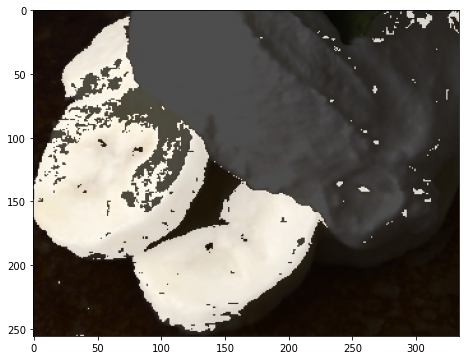

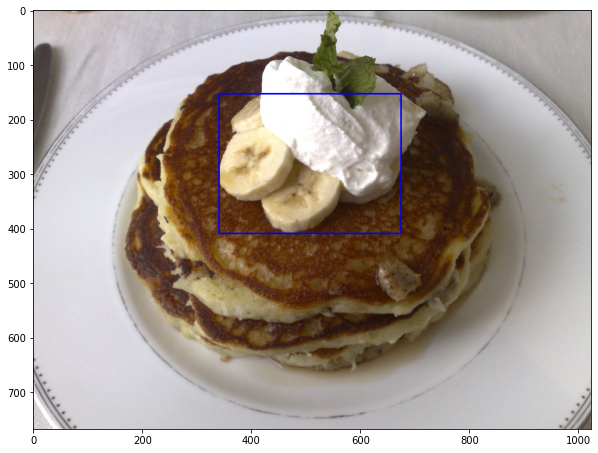

In [39]:
img_path = list(mid_img_dir_test.glob("banana*.jpg"))[6]
img_path = img_path.parent / "banana_7406393b12ce459b.jpg"
image = cv2.imread(str(img_path))
h, w = image.shape[:-1]

with open(
    mid_label_dir_test / img_path.with_suffix(".txt").name
) as infile:
    boxes = [line.strip().split() for line in infile.readlines()]
    for i, box in enumerate(boxes):
        boxes[i][1:] = map(float, box[1:])

_, ax = plt.subplots(1, len(boxes), figsize=(20, 6))

green = False
image_copy = image.copy()
for i, box in enumerate(boxes):
    x = int(box[1] * w)
    y = int(box[2] * h)
    width = int(box[3] * w)
    height = int(box[4] * h)
    x_min = max(0, int(x - width // 2))
    x_max = int(x + width // 2)
    y_min = max(0, int(y - height // 2))
    y_max = int(y + height // 2)
    bbox = image_copy[y_min : y_max, x_min : x_max, ::-1]
    bbox_hsv = cv2.cvtColor(bbox, cv2.COLOR_RGB2HSV)
    h_coeff = 0.5
    s_coeff = 255 / 100
    v_coeff = 255 / 100
    mask = (
        (bbox_hsv[:, :, 0] > 30 * h_coeff)
        & (bbox_hsv[:, :, 0] < 45 * h_coeff)
        & (bbox_hsv[:, :, 1] > 20 * s_coeff)
        & (bbox_hsv[:, :, 1] < 60 * s_coeff)
        & (bbox_hsv[:, :, 2] > 50 * v_coeff)
        & (bbox_hsv[:, :, 2] < 100 * v_coeff)
        # & (bbox.std(2) > 5)
    )
    print(mask.sum() / (bbox.shape[0] * bbox.shape[1]))
    print(mask.sum() / (bbox.shape[0] * bbox.shape[1]) > 0.2)
    green = green or mask.sum() / (bbox.shape[0] * bbox.shape[1]) > 0.2
    (ax[i] if len(boxes) > 1 else ax).imshow(bbox)
    (ax[i] if len(boxes) > 1 else ax).imshow(
        mask, cmap="gray", alpha=0.7
    )
    image = cv2.rectangle(
        image,
        (x_min, y_min),
        (x_max, y_max),
        (255, 0, 0),
        2,
    )

_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.imshow(image[:, :, ::-1])

In [42]:
for img_path in mid_img_dir_test.glob("[0-9]*.jpg"):
    image = cv2.imread(str(img_path))
    h, w = image.shape[:-1]

    with open(
        mid_label_dir_test / img_path.with_suffix(".txt").name
    ) as infile:
        boxes = [line.strip().split() for line in infile.readlines()]
        for i, box in enumerate(boxes):
            boxes[i][1:] = map(float, box[1:])

    # _, ax = plt.subplots(1, len(boxes), figsize=(20, 6))

    green = False
    image_copy = image.copy()
    for i, box in enumerate(boxes):
        x = int(box[1] * w)
        y = int(box[2] * h)
        width = int(box[3] * w)
        height = int(box[4] * h)
        x_min = int(x - width // 2)
        x_max = int(x + width // 2)
        y_min = int(y - height // 2)
        y_max = int(y + height // 2)
        if box[0] == "1":
            bbox = image_copy[y_min : y_max, x_min : x_max, ::-1]
            try:
                bbox_hsv = cv2.cvtColor(bbox, cv2.COLOR_RGB2HSV)
            except:
                print(img_path)
                continue
            h_coeff = 0.5
            s_coeff = 255 / 100
            v_coeff = 255 / 100
            mask = (
                (bbox_hsv[:, :, 0] > 30 * h_coeff)
                & (bbox_hsv[:, :, 0] < 45 * h_coeff)
                & (bbox_hsv[:, :, 1] > 20 * s_coeff)
                & (bbox_hsv[:, :, 1] < 60 * s_coeff)
                & (bbox_hsv[:, :, 2] > 50 * v_coeff)
                & (bbox_hsv[:, :, 2] < 100 * v_coeff)
                # & (bbox.std(2) > 5)
            )
            # print(mask.sum())
            # print(mask.sum() / (bbox.shape[0] * bbox.shape[1]) > 0.4)
            green = (
                green
                or mask.sum() / (bbox.shape[0] * bbox.shape[1]) > 0.2
            )
            # (ax[i] if len(boxes) > 1 else ax).imshow(bbox)
            # (ax[i] if len(boxes) > 1 else ax).imshow(
            #     mask, cmap="gray", alpha=0.7
            # )
            image = cv2.rectangle(
                image,
                (x_min, y_min),
                (x_max, y_max),
                (255, 0, 0),
                2,
            )
        else:
            image = cv2.rectangle(
                image,
                (x_min, y_min),
                (x_max, y_max),
                (0, 255, 0),
                2,
            )

    # _, axes = plt.subplots(1, 1, figsize=(10, 10))
    # axes.imshow(image[:, :, ::-1])
    if green:
        cv2.imwrite(str(labeled_test / img_path.name), image)

In [41]:
for path in labeled_test.glob("*.jpg"):
    image_path = mid_img_dir_test / path.name
    label_path = mid_label_dir_test / f"{path.stem}.txt"
    if image_path.exists() and label_path.exists():
        print(path)
        print(image_path)
        print(label_path)
        os.remove(image_path)
        os.remove(label_path)



c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\labeled_test\banana_711f8d4896d856f9.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\test\banana_711f8d4896d856f9.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\labels\test\banana_711f8d4896d856f9.txt
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\labeled_test\banana_7406393b12ce459b.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\test\banana_7406393b12ce459b.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\labels\test\banana_7406393b12ce459b.txt
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\labeled_test\banana_db3de568c0408aaa.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\images\test\banana_db3de568c0408aaa.jpg
c:\GitRepos\yolov5_workspace\oidv6_data_fruits\labels\test\banana_db3de568c0408aaa.txt


In [43]:
colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]
for img_path in labeled_test.glob("*.jpg"):
    image = cv2.imread(str(mid_img_dir_test / img_path.name))
    h, w = image.shape[:-1]

    with open(
        mid_label_dir_test / img_path.with_suffix(".txt").name
    ) as infile:
        boxes = [line.strip().split() for line in infile.readlines()]
        for i, box in enumerate(boxes):
            boxes[i][1:] = map(float, box[1:])

    image_copy = image.copy()
    for i, box in enumerate(boxes):
        x = int(box[1] * w)
        y = int(box[2] * h)
        width = int(box[3] * w)
        height = int(box[4] * h)
        x_min = int(x - width // 2)
        x_max = int(x + width // 2)
        y_min = int(y - height // 2)
        y_max = int(y + height // 2)
        image = cv2.rectangle(
            image,
            (x_min, y_min),
            (x_max, y_max),
            colors[int(box[0])],
            1,
        )

    cv2.imwrite(str(relabel_test / img_path.name), image)